<a href="https://colab.research.google.com/github/MITXy/Machine-Learning-Models/blob/main/AutoML%20with%20Pycaret/Chun_modelling_with_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [54]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.20+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.21 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
en-core-web-sm 3.4.0 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.7 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.2

In [2]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

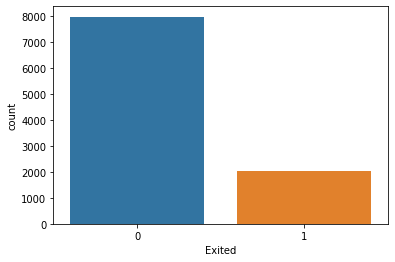

In [3]:
sns.countplot(data.Exited)

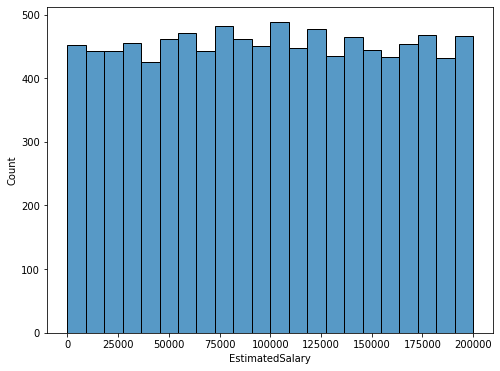

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data.EstimatedSalary)

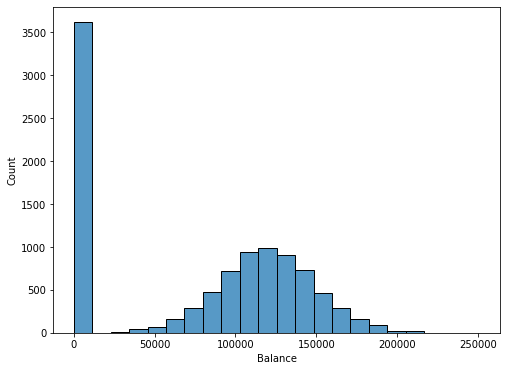

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data.Balance)

In [5]:
from pycaret.classification import *

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [8]:
modelling = setup(data=data, target="Exited",\
                  ignore_features=['RowNumber',"CustomerId",'Surname'],\
                  categorical_features=['Geography','Gender','HasCrCard',\
                                        'IsActiveMember','Tenure'],\
                  numeric_imputation="mean")

,Description,Value
0,session_id,6284
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Geography',
                                                            'Gender',
                                                            'HasCrCard',
                                                            'IsActiveMember',
                                                            'Tenure'],
                                      display_types=True,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
  

In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8641,0.8643,0.4749,0.7662,0.5852,0.5094,0.5309,0.636
rf,Random Forest Classifier,0.8636,0.8481,0.4679,0.7677,0.5807,0.5051,0.5275,0.966
lightgbm,Light Gradient Boosting Machine,0.8605,0.8523,0.4954,0.7307,0.5895,0.5093,0.5238,0.178
ada,Ada Boost Classifier,0.8556,0.8464,0.4686,0.7196,0.5670,0.4852,0.5015,0.227
et,Extra Trees Classifier,0.8450,0.8200,0.4348,0.6854,0.5314,0.4442,0.4610,0.754
lda,Linear Discriminant Analysis,0.8383,0.8312,0.3501,0.7051,0.4666,0.3839,0.4172,0.032
ridge,Ridge Classifier,0.8345,0.0000,0.2555,0.7825,0.3841,0.3160,0.3830,0.014
qda,Quadratic Discriminant Analysis,0.7975,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.023
dummy,Dummy Classifier,0.7975,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.015
lr,Logistic Regression,0.7917,0.6683,0.0572,0.3926,0.0995,0.0517,0.0830,0.291


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6284, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6284, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8729,0.8786,0.4610,0.8333,0.5936,0.5255,0.5579
1,0.8714,0.8887,0.4752,0.8072,0.5982,0.5277,0.5540
2,0.8614,0.8697,0.4648,0.7586,0.5764,0.4992,0.5207
3,0.8600,0.8351,0.4296,0.7821,0.5545,0.4797,0.5101
4,0.8771,0.8915,0.5352,0.7917,0.6387,0.5680,0.5838
5,0.8500,0.8542,0.4507,0.7033,0.5494,0.4645,0.4811
6,0.8643,0.8570,0.5282,0.7282,0.6122,0.5325,0.5426
7,0.8814,0.8886,0.5352,0.8172,0.6468,0.5793,0.5980
8,0.8486,0.8332,0.4014,0.7308,0.5182,0.4372,0.4649


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6284, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [11]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8671,0.8810,0.4610,0.7927,0.5830,0.5104,0.5370
1,0.8729,0.8889,0.4894,0.8023,0.6079,0.5373,0.5607
2,0.8629,0.8715,0.4648,0.7674,0.5789,0.5029,0.5254
3,0.8600,0.8325,0.4437,0.7683,0.5625,0.4862,0.5122
4,0.8814,0.8899,0.5423,0.8105,0.6498,0.5818,0.5988
5,0.8529,0.8632,0.4507,0.7191,0.5541,0.4715,0.4900
6,0.8714,0.8570,0.5493,0.7500,0.6341,0.5584,0.5684
7,0.8814,0.8881,0.5423,0.8105,0.6498,0.5818,0.5988
8,0.8486,0.8413,0.4155,0.7195,0.5268,0.4442,0.4680


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6284, subsample=0.75, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


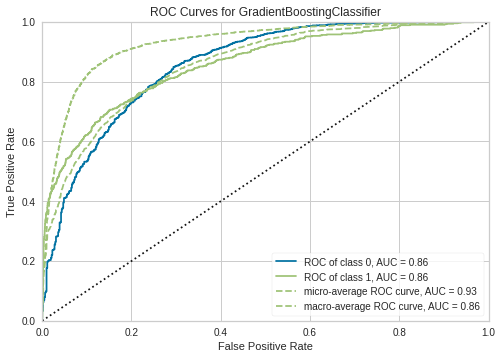

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(estimator=tuned_gbc, plot='auc')

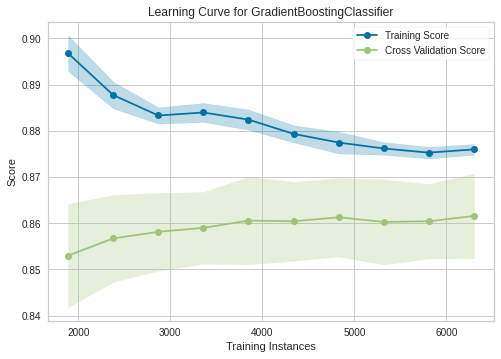

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [23]:
plot_model(estimator=tuned_gbc, plot='learning')

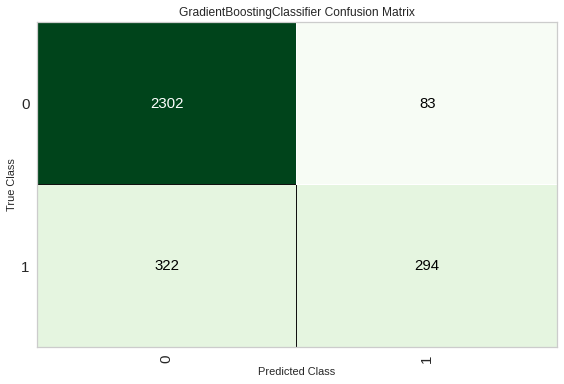

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
plot_model(estimator=tuned_gbc, plot='confusion_matrix')

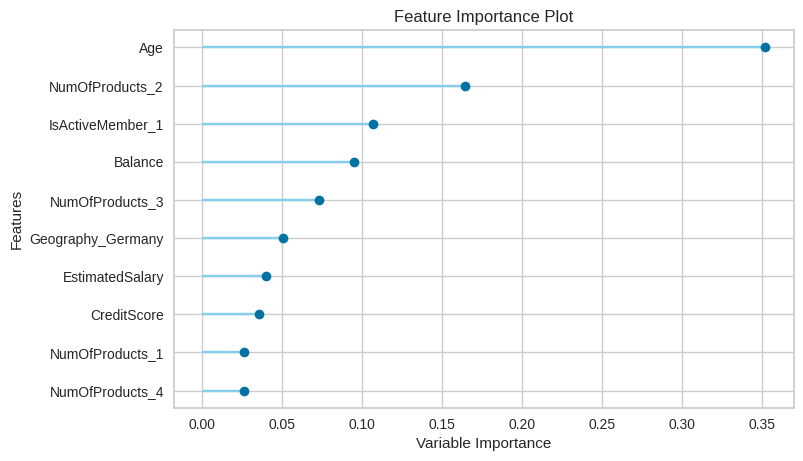

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(estimator=tuned_gbc, plot='feature')

In [30]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 21.5 MB/s 


In [50]:
!pip3 install numpy==1.21.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 26.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.21.4 which is incompatible.
en-core-web-sm 3.4.0 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.7 which is incompatible.


In [52]:
!pip3 install pip install numba==0.53.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 19.2 MB/s 
     |████████████████████████████████| 25.3 MB 63.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


In [53]:
!pip3 install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import shap

In [15]:
lgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8714,0.8738,0.4752,0.8072,0.5982,0.5277,0.5540
1,0.8700,0.8788,0.5106,0.7660,0.6128,0.5384,0.5544
2,0.8600,0.8528,0.5000,0.7245,0.5917,0.5106,0.5234
3,0.8557,0.8169,0.4507,0.7356,0.5590,0.4786,0.4991
4,0.8671,0.8779,0.5634,0.7207,0.6324,0.5528,0.5591
5,0.8543,0.8538,0.4930,0.7000,0.5785,0.4936,0.5047
6,0.8529,0.8437,0.5070,0.6857,0.5830,0.4961,0.5044
7,0.8829,0.8723,0.5493,0.8125,0.6555,0.5880,0.6044
8,0.8429,0.8308,0.4225,0.6818,0.5217,0.4339,0.4517


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6284, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [16]:
tune_lgb = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8657,0.8785,0.4539,0.7901,0.5766,0.5036,0.5310
1,0.8657,0.8832,0.5106,0.7423,0.6050,0.5275,0.5409
2,0.8571,0.8606,0.5000,0.7100,0.5868,0.5035,0.5149
3,0.8600,0.8174,0.4577,0.7558,0.5702,0.4925,0.5146
4,0.8986,0.8800,0.5986,0.8586,0.7054,0.6465,0.6618
5,0.8371,0.8545,0.4225,0.6522,0.5128,0.4204,0.4346
6,0.8543,0.8485,0.4859,0.7041,0.5750,0.4906,0.5029
7,0.8814,0.8773,0.5563,0.7980,0.6556,0.5867,0.6007
8,0.8500,0.8331,0.4648,0.6947,0.5570,0.4709,0.4847


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.4, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=36, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=80, n_jobs=-1, num_leaves=10, objective=None,
               random_state=6284, reg_alpha=4, reg_lambda=0.4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


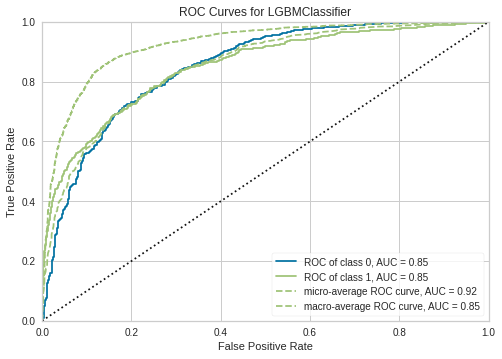

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [38]:
plot_model(estimator=tune_lgb, plot='auc')

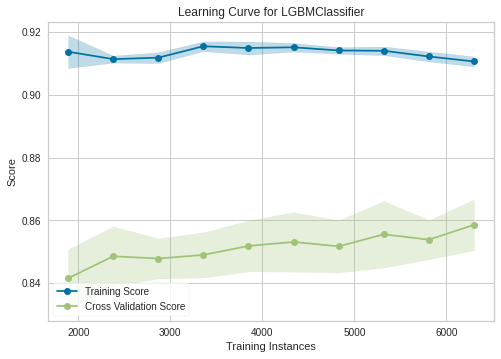

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [40]:
plot_model(estimator=tune_lgb, plot='learning')

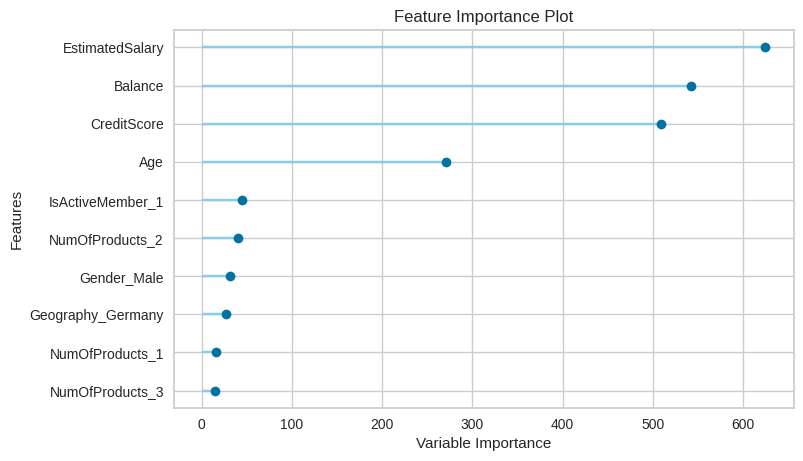

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [41]:
plot_model(estimator=tune_lgb, plot='feature')

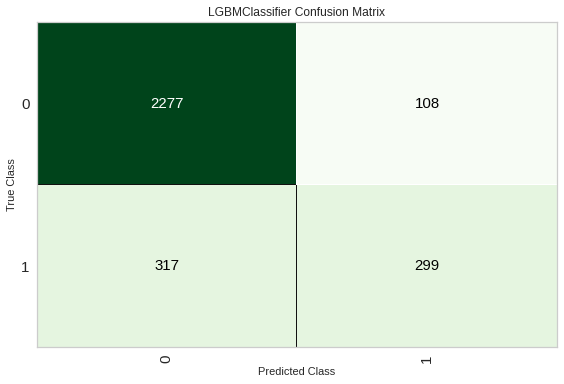

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [42]:
plot_model(estimator=tune_lgb, plot='confusion_matrix')

In [43]:
rf = create_model("rf")
blend = blend_models([tuned_gbc, tune_lgb, rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8754,0.5105,0.7087,0.5935,0.5096,0.5197
1,0.8443,0.8455,0.4296,0.6854,0.5281,0.4407,0.4580
2,0.8771,0.8878,0.5563,0.7745,0.6475,0.5756,0.5871
3,0.8514,0.8489,0.4296,0.7262,0.5398,0.4581,0.4806
4,0.8700,0.8739,0.5070,0.7742,0.6128,0.5387,0.5561
5,0.8543,0.8689,0.5000,0.6961,0.5820,0.4966,0.5066
6,0.8643,0.8460,0.5141,0.7374,0.6058,0.5270,0.5395
7,0.8614,0.8631,0.4789,0.7473,0.5837,0.5053,0.5233
8,0.8629,0.8558,0.4789,0.7556,0.5862,0.5089,0.5279


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.15,
                                                         loss='deviance',
                                                         max_depth=2,
                                                         max_features=1.0,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.1,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
        

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(bagging_fraction=0.4, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=36, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=80, n_jobs=-1, num_leaves=10, objective=None,
               random_state=6284, reg_alpha=4, reg_lambda=0.4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


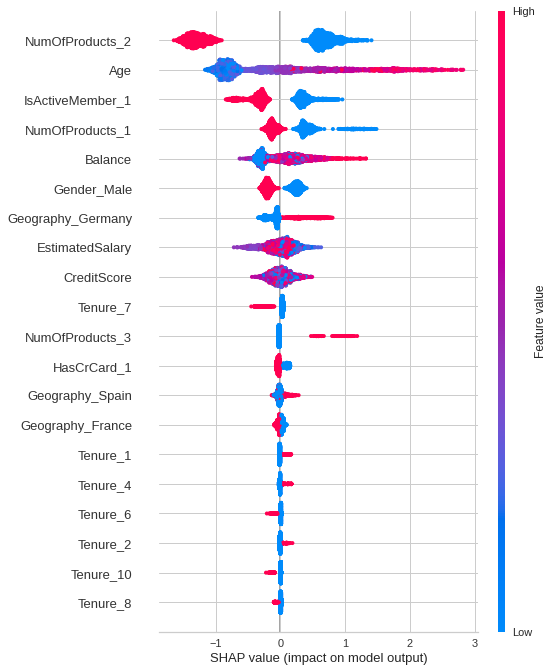

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [17]:
interpret_model(tune_lgb)

In [20]:
modelling2 = setup(data=data, target="Exited",\
                   ignore_features=['RowNumber',"CustomerId",'Surname'],\
                  categorical_features=['Geography','Gender','HasCrCard',\
                                        'IsActiveMember','Tenure'],\
                  numeric_imputation="mean", remove_outliers=True)

,Description,Value
0,session_id,4154
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Geography',
                                                            'Gender',
                                                            'HasCrCard',
                                                            'IsActiveMember',
                                                            'Tenure'],
                                      display_types=True,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
  

In [21]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8619,0.8429,0.3899,0.7034,0.5012,0.4287,0.4542,0.594
rf,Random Forest Classifier,0.8585,0.8245,0.3503,0.7112,0.4677,0.3971,0.4310,0.806
lightgbm,Light Gradient Boosting Machine,0.8573,0.8334,0.4026,0.6666,0.5014,0.4240,0.4427,0.180
ada,Ada Boost Classifier,0.8556,0.8211,0.3689,0.6735,0.4760,0.4006,0.4254,0.223
lda,Linear Discriminant Analysis,0.8425,0.8109,0.3055,0.6207,0.4082,0.3295,0.3577,0.028
et,Extra Trees Classifier,0.8406,0.8035,0.3207,0.6017,0.4176,0.3350,0.3578,0.704
ridge,Ridge Classifier,0.8394,0.0000,0.1536,0.7453,0.2540,0.2052,0.2881,0.015
dummy,Dummy Classifier,0.8218,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.015
lr,Logistic Regression,0.8155,0.6669,0.0422,0.3605,0.0751,0.0386,0.0681,0.280
nb,Naive Bayes,0.8064,0.7505,0.0667,0.3124,0.1094,0.0486,0.0682,0.015


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4154, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4154, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)